In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/cleaned_flat_df1.csv')

In [4]:
df['adjusted_price_per_sqft'].describe()

count      2967.000000
mean       8036.191048
std       10625.179251
min           3.569455
25%        4894.011981
50%        6222.222222
75%        8531.899642
max      181818.181818
Name: adjusted_price_per_sqft, dtype: float64

In [226]:
df.dropna(inplace = True)

In [227]:
df['bed_bath_ratio'] = df['bedRoom'] / df['bathroom']
df['log_area'] = np.log1p(df['SuperBuildUp_adjusted_area'])


In [228]:


# 1️⃣ Lowercase + strip
df['society_clean'] = df['society'].astype(str).str.lower().str.strip()

# 2️⃣ Remove trailing numbers (e.g., '38 ', '39 ') at end
df['society_clean'] = df['society_clean'].str.replace(r'\d+\s*$', '', regex=True)

# 3️⃣ Remove extra spaces inside
df['society_clean'] = df['society_clean'].str.replace(r'\s+', ' ', regex=True)

# 4️⃣ Fix common typos (optional)
df['society_clean'] = df['society_clean'].str.replace('appartment', 'apartment')

# ✅ Check unique cleaned societies
cleaned_unique = df['society_clean'].unique().tolist()
print("\n✅ Cleaned unique societies:")
print(cleaned_unique)

# 5️⃣ See possible duplicates grouped
dupes = df.groupby('society_clean')['society'].unique()
print("\n🔍 Original names grouped by cleaned version:")
print(dupes)



✅ Cleaned unique societies:
['maa bhagwati residency', 'apna enclave', 'tulsiani easy in homes', 'smart world orchard', 'parkwood westend', 'signature global infinity mall', 'the cocoon', 'ats triumph', 'vatika xpressions', 'raheja revanta', 'signature global city ', 'hcbs sports ville', 'supertech araville', 'godrej', 'shree vardhman flora', 'sobha city', 'senate court', 'shapoorji pallonji joyville gurugram', 'central park flower valley', 'smart world gems', 'bestech altura', 'emaar imperial gardens', 'la vida by tata housing', 'the serenas', 'm3m golfestate', 'central park resort belgravia residences', 'apex builders', 'godrej habitat', 'ompee k s residency', 'bhawna cghs', 'adani aangan arcade', 'sare green parc', 'supertech hues', 'chintels paradiso', 'breez global hill view', 'ild greens', 'ansal sushant lok ci', 'ashiana mulberry', 'godrej meridien', 'mapsko casa bella', 'pooja apartment', 'signature global park', 'dlf new town heights ', 'paras dews', 'godrej air', 'dlf the pr

In [229]:
def count_rooms(value):
    # If it's 'unavailable' or empty, return 0
    if pd.isna(value) or value.lower() == 'unavailable':
        return 0
    # Split by comma, strip spaces, count
    return len([room.strip() for room in value.split(',') if room.strip()])
df['additional_room_count'] = df['additionalRoom'].apply(count_rooms)


In [230]:

df = df.astype({
    'bedRoom': int,
    'bathroom': int,
    'floor': int, 
    'additional_room_count': int
})

<Axes: >

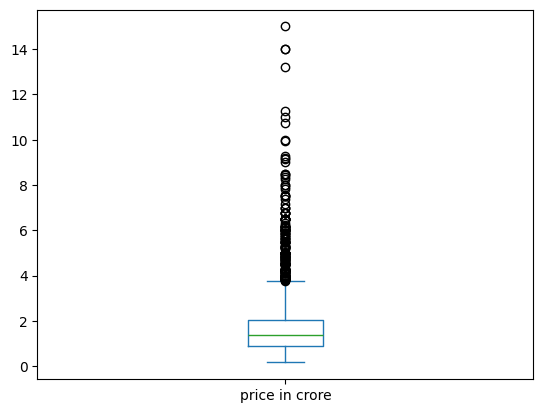

In [231]:

df.plot.box( y='price in crore')


In [232]:
df['log_price'] = np.log1p(df['price in crore'])

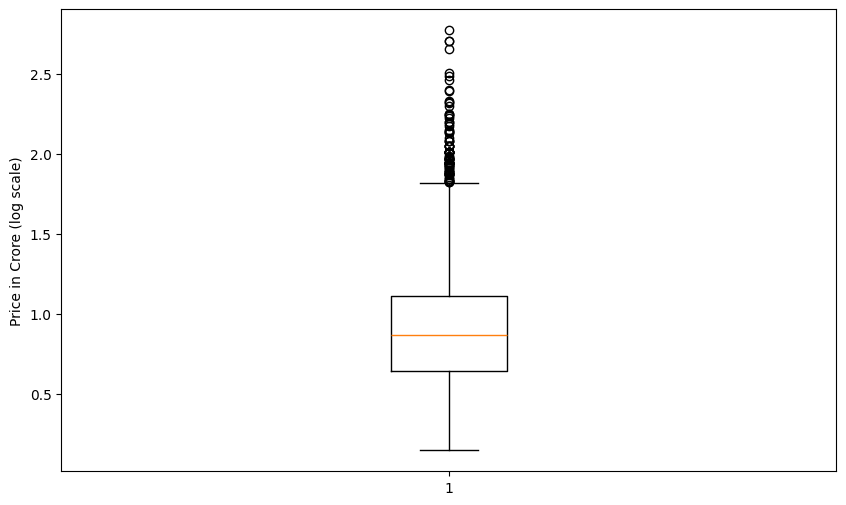

In [233]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['log_price'])
plt.ylabel('Price in Crore (log scale)')
plt.show()

In [234]:
df.select_dtypes(object)

,property_name,society,balcony,additionalRoom,facing,agePossession,sector,furnish_category,features_category,society_clean
0,2 BHK Flat,maa bhagwati residency,1,unavailable,West,new,Krishna Colony,Fancy,Minimal,maa bhagwati residency
1,2 BHK Flat,Apna Enclave,1,unavailable,West,old,Ashok Vihar,Fancy,Minimal,apna enclave
2,2 BHK Flat,Tulsiani Easy in Homes,3,unavailable,unavailable,newly built,Sohna,Unavailable,Basic,tulsiani easy in homes
3,2 BHK Flat,Smart World Orchard,2,Study Room,unavailable,under construction,Sector 61 Gurgaon,Unavailable,Good,smart world orchard
4,2 BHK Flat,Parkwood Westend,3,Study Room,unavailable,under construction,Sector 92 Gurgaon,Unavailable,Minimal,parkwood westend
...,...,...,...,...,...,...,...,...,...,...
2962,3 BHK Flat,Godrej Aria38,3+,Servant Room,unavailable,newly built,Sector 79 Gurgaon,Unavailable,Minimal,godrej aria
2963,3 BHK Flat,Ansal Estella,3+,unavailable,unavailable,under construction,Sector 103 Gurgaon,Unavailable,Basic,ansal estella
2964,4 BHK Flat,Chanderlok Society,3+,unavailable,unavailable,old,DLF Phase 4,Unavailable,Minimal,chanderlok society
2965,3 BHK Flat,Jammu and Kashmir Bank Employees CGHS37,2,Others,West,mid-age,Sector 9A Gurgaon,Fancy,Minimal,jammu and kashmir bank employees cghs


In [235]:
df

,property_name,society,bedRoom,bathroom,balcony,additionalRoom,facing,agePossession,sector,price in crore,...,furnish_score,furnish_category,features_score,features_category,rating_sum,bed_bath_ratio,log_area,society_clean,additional_room_count,log_price
0,2 BHK Flat,maa bhagwati residency,2,2,1,unavailable,West,new,Krishna Colony,0.45,...,30.5,Fancy,8.5,Minimal,20.0,1.00,7.159847,maa bhagwati residency,0,0.371564
1,2 BHK Flat,Apna Enclave,2,2,1,unavailable,West,old,Ashok Vihar,0.50,...,32.5,Fancy,7.5,Minimal,20.0,1.00,6.834724,apna enclave,0,0.405465
2,2 BHK Flat,Tulsiani Easy in Homes,2,2,3,unavailable,unavailable,newly built,Sohna,0.40,...,-1.0,Unavailable,13.5,Basic,20.0,1.00,6.746412,tulsiani easy in homes,0,0.336472
3,2 BHK Flat,Smart World Orchard,2,2,2,Study Room,unavailable,under construction,Sector 61 Gurgaon,1.47,...,-1.0,Unavailable,21.0,Good,0.0,1.00,7.447335,smart world orchard,1,0.904218
4,2 BHK Flat,Parkwood Westend,2,2,3,Study Room,unavailable,under construction,Sector 92 Gurgaon,0.70,...,-1.0,Unavailable,0.0,Minimal,20.0,1.00,7.300135,parkwood westend,1,0.530628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,3 BHK Flat,Godrej Aria38,3,4,3+,Servant Room,unavailable,newly built,Sector 79 Gurgaon,1.95,...,-1.0,Unavailable,8.0,Minimal,25.0,0.75,8.092851,godrej aria,1,1.081805
2963,3 BHK Flat,Ansal Estella,3,3,3+,unavailable,unavailable,under construction,Sector 103 Gurgaon,1.50,...,-1.0,Unavailable,16.0,Basic,20.0,1.00,7.812956,ansal estella,0,0.916291
2964,4 BHK Flat,Chanderlok Society,4,2,3+,unavailable,unavailable,old,DLF Phase 4,0.90,...,-1.0,Unavailable,0.0,Minimal,20.0,2.00,7.483325,chanderlok society,0,0.641854
2965,3 BHK Flat,Jammu and Kashmir Bank Employees CGHS37,3,3,2,Others,West,mid-age,Sector 9A Gurgaon,0.95,...,32.5,Fancy,8.0,Minimal,25.0,1.00,7.441907,jammu and kashmir bank employees cghs,1,0.667829


| Column name                  | Example value                      | Data type           | Encoding suggestion                                               |
| ---------------------------- | ---------------------------------- | ------------------- | ----------------------------------------------------------------- |
| `property_name`              | `2 BHK Flat`                       | Nominal Categorical | ✅ **Label Encoding** (if ordinal meaning) |
| `society`                    | `maa bhagwati residency`           | Nominal Categorical | ✅ **Label Encoding**                      |
| `bedRoom`                    | `2`                                | Numeric             | ✅ **Keep as numeric**                                             |
| `bathroom`                   | `2`                                | Numeric             | ✅ **Keep as numeric**                                             |
| `balcony`                    | `1`                                | Numeric             | ✅ **Keep as numeric**                                             |
| `facing`                     | `West`                             | Nominal Categorical | ✅ **One-Hot Encoding**                                            |
| `agePossession`              | `new`, `old`, `under construction` | Ordinal Categorical | ✅ **Ordinal Encoding**                      |
| `sector`                     | `Krishna Colony`                   | Nominal Categorical | ✅ **One-Hot Encoding** or **Label Encoding**                      |
| `SuperBuildUp_adjusted_area` | `1285.71`                          | Numeric             | ✅ **Keep as numeric**                                             |
| `adjusted_price_per_sqft`    | `3500`                             | Numeric             | ✅ **Keep as numeric**                                             |
| `Servant Room`               | `0` or `1`                         | Binary              | ✅ **Already encoded**                                             |
| `Store Room`                 | `0` or `1`                         | Binary              | ✅ **Already encoded**                                             |
| `Study Room`                 | `0` or `1`                         | Binary              | ✅ **Already encoded**                                             |
| `unavailable`                | `0` or `1`                         | Binary              | ✅ **Already encoded**                                             |
| `floor`                      | `4`                                | Numeric             | ✅ **Keep as numeric**                                             |
| `furnish_score`              | `30.5`                             | Numeric             | ✅ **Keep as numeric**                                             |
| `furnish_category`           | `Fancy`                            | Nominal Categorical | ✅ **One-Hot Encoding**                                            |
| `features_score`             | `8.5`                              | Numeric             | ✅ **Keep as numeric**                                             |
| `features_category`          | `Minimal`                          | Nominal Categorical | ✅ **One-Hot Encoding**                                            |
| `rating_sum`                 | `20`                               | Numeric             | ✅ **Keep as numeric**                                             |


In [236]:
df.to_csv('final_df.csv')

In [237]:
x = df.drop(['price in crore','log_price','society'], axis = 1)
y = df['log_price']

In [238]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=42)

# Feature Selection

## Correlation

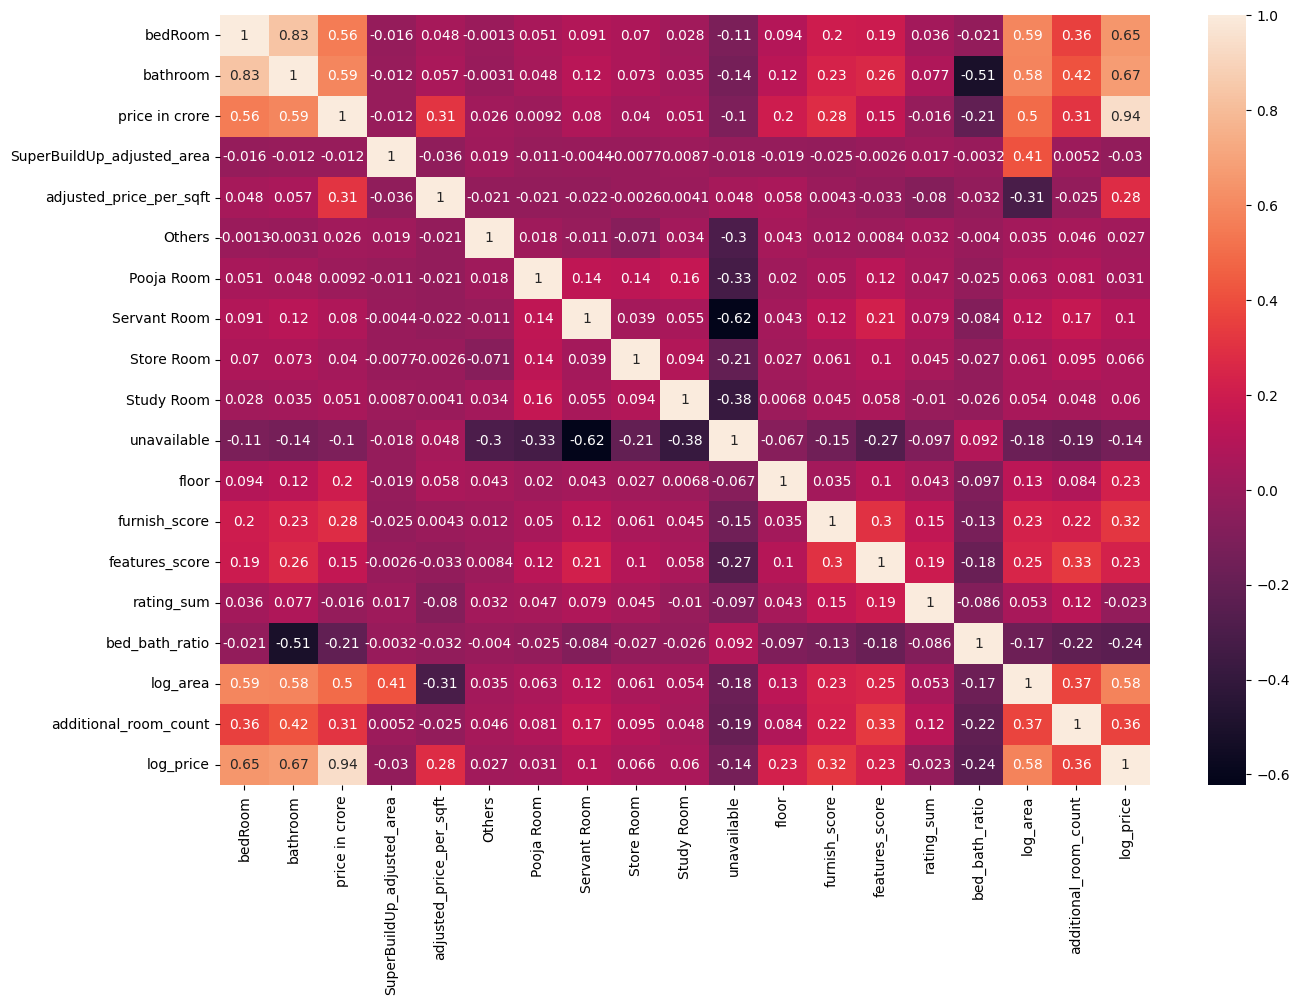

In [239]:
corr = df.corr(numeric_only= True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

In [240]:
import pandas as pd

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Extract correlations with target columns
result = corr[['log_price', 'price in crore']].copy()

# Add feature names as a column (index to column)
result = result.reset_index().rename(columns={'index': 'Feature'})

# Filter only positive correlations
positive_corr = result[(result['log_price'] >0) | (result['price in crore'] > 0)]

# Optional: limit to top 20 if needed
positive_corr = positive_corr.head(21)

print(positive_corr)


                    Feature  log_price  price in crore
0                   bedRoom   0.647896        0.555435
1                  bathroom   0.672235        0.592715
2            price in crore   0.939535        1.000000
4   adjusted_price_per_sqft   0.282804        0.314349
5                    Others   0.026877        0.026071
6                Pooja Room   0.031128        0.009187
7              Servant Room   0.103370        0.080035
8                Store Room   0.065675        0.040350
9                Study Room   0.059650        0.051480
11                    floor   0.226601        0.201007
12            furnish_score   0.315527        0.281527
13           features_score   0.230790        0.152872
16                 log_area   0.578121        0.496400
17    additional_room_count   0.364089        0.310185
18                log_price   1.000000        0.939535


In [241]:
positive_corr.sort_values(by = 'log_price', ascending = False)

,Feature,log_price,price in crore
18,log_price,1.000000,0.939535
2,price in crore,0.939535,1.000000
1,bathroom,0.672235,0.592715
0,bedRoom,0.647896,0.555435
16,log_area,0.578121,0.496400
17,additional_room_count,0.364089,0.310185
12,furnish_score,0.315527,0.281527
4,adjusted_price_per_sqft,0.282804,0.314349
13,features_score,0.230790,0.152872
11,floor,0.226601,0.201007


## Rigde Regression

In [242]:
from sklearn.linear_model import Ridge
ri = Ridge()

ri.fit(x_train, y_train)

Ridge_coef = ri.coef_
df_Ridge_coef = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': Ridge_coef,
    'Importance (abs)': abs(Ridge_coef)
})


ValueError: could not convert string to float: '4 BHK Flat'

In [ ]:
df_Ridge_coef.round(5).sort_values(by='Importance (abs)',ascending = False)

## Lasso 

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso(max_iter = 2000)

la.fit(x_train, y_train)

coef = la.coef_
df_lasso_coef = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coef,
    'Importance (abs)': abs(coef)
})
df_lasso_coef.round(6).sort_values(by='Importance (abs)',ascending = False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort features by importance
df_lasso_coef_sorted = df_lasso_coef.sort_values(by='Importance (abs)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_lasso_coef_sorted,
    y='Feature',
    x='Importance (abs)',
    orient='h'
)
plt.title('Feature Importance (abs)')
plt.show()


## Anova

In [ ]:
from sklearn.feature_selection import f_regression


# Make sure X is numeric: encode categorical if needed!
# Example: if you still have categoricals, do pd.get_dummies()
X_encoded = pd.get_dummies(x, drop_first=True)

# Perform ANOVA F-test
F_values, p_values = f_regression(X_encoded, y)

# Make a DataFrame
anova_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'F-Value': F_values,
    'p-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print(anova_df.round(5))


##  Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Example:
X = df.drop(columns=['price in crore', 'log_price'])
y = df['log_price']

# Encode categoricals if needed
X_encoded = pd.get_dummies(X, drop_first=True)

# Compute MI scores
mi_scores = mutual_info_regression(X_encoded, y)

# Put in a DataFrame
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

print(mi_df)


## Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

rf_importances = rf.feature_importances_

rf_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

print(rf_df)


## Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_df)


## Shap

In [ ]:
import shap

# Use your trained Random Forest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Visual summary plot
shap.summary_plot(shap_values, X_test)


In [ ]:
positive_corr,df_lasso_coef ,df_Ridge_coef,perm_df,rf_df,mi_df,anova_df

In [ ]:
pd.merge(positive_corr,df_lasso_coef,on ='Feature' )

In [ ]:
import pandas as pd
import functools

# Keep them in a list with names
dfs = [
    ('CORR', positive_corr),
    ('LASSO', df_lasso_coef),
    ('RIDGE', df_Ridge_coef),
    ('PERM', perm_df),
    ('RF', rf_df),
    ('MI', mi_df),
    ('ANOVA', anova_df)
]

# Add prefixes to columns (except 'Feature')
renamed_dfs = []
for prefix, df in dfs:
    renamed_df = df.copy()
    renamed_df = renamed_df.rename(
        columns={col: f"{prefix}_{col}" for col in df.columns if col != 'Feature'}
    )
    renamed_dfs.append(renamed_df)

# Merge all on 'Feature'
merged_df = functools.reduce(
    lambda left, right: pd.merge(left, right, on='Feature', how='outer'),
    renamed_dfs
)

print(merged_df.head())


In [ ]:
merged_df.columns

In [ ]:
merged_df = merged_df[['Feature', 'CORR_log_price', 'LASSO_Coefficient',
       'LASSO_Importance (abs)', 'RIDGE_Coefficient',
       'RIDGE_Importance (abs)', 'PERM_Importance', 'RF_Importance',
       'MI_MI Score', 'ANOVA_F-Value', 'ANOVA_p-Value']]

In [ ]:
merged_df = merged_df.round(4)
merged_df.to_csv("feature_importance", sep=",")